In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import argparse
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

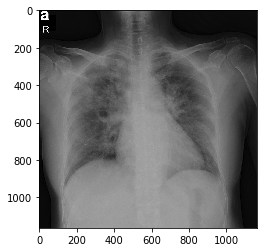

In [5]:
data=plt.imread('F:\\桌面\\keras-covid-19\\dataset\\covid\\1-s2.0-S0929664620300449-gr2_lrg-a.jpg')
plt.imshow(data)

In [7]:
Data='F:\\桌面\\keras-covid-19\\dataset\\'
train_data=[]
size=250
categories=["covid","normal"]
for category in categories:
    path = os.path.join(Data,category) 
    class_num=categories.index(category)
    for img in os.listdir(path):
        try: 
            img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array,(size,size))/255
            train_data.append([new_array,class_num])
        except Exception as e:
                pass

In [8]:
import random
random.shuffle(train_data)
X=[]
y=[]
for features, label in train_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,size, size,1)
y=np.array(y)
import pickle 
export  = open('z.pickle','wb')
pickle.dump(X,export)
export.close()
exporty  = open('y.pickle','wb')
pickle.dump(y,exporty)
exporty.close()

In [9]:
import time
pickle_in=open('z.pickle','rb')
X=pickle.load(pickle_in)
picklein=open('y.pickle','rb')
y=pickle.load(picklein)
dense_layers=[1]
layer_sizes=[128]
con_layers=[3]
for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for con_layer in con_layers:
            Name='{}-con-{}-nodes-{}-dense-{}'.format(con_layer,layer_size,dense_layer,int(time.time()))
            tensorboard=TensorBoard(log_dir='logs\\{}'.format(Name))
            
            model=Sequential()
            model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            for l in range(con_layer-1):
                model.add(Conv2D(64,(3,3)))
                model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Flatten())
            for l in range(dense_layer):
                model.add(Dense(512))
                model.add(Activation('relu'))
                model.add(Dropout(0.2))
            model.add(Dense(1))
            model.add(Activation('sigmoid'))
            model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
            model.fit(X,y,batch_size=22,epochs=20,validation_split=0.1,callbacks=[tensorboard])
model.save('CNN.model')
%tensorboard

Train on 45 samples, validate on 5 samples
Epoch 1/20
45/45 [==============================] - 3s 66ms/sample - loss: 0.5101 - accuracy: 0.7111 - val_loss: 12.1721 - val_accuracy: 0.6000
Epoch 2/20
45/45 [==============================] - 0s 5ms/sample - loss: 8.4124 - accuracy: 0.5333 - val_loss: 2.7684 - val_accuracy: 0.6000
Epoch 3/20
45/45 [==============================] - 0s 5ms/sample - loss: 2.9743 - accuracy: 0.5111 - val_loss: 0.9482 - val_accuracy: 0.4000
Epoch 4/20
45/45 [==============================] - 0s 5ms/sample - loss: 1.1947 - accuracy: 0.5111 - val_loss: 0.3489 - val_accuracy: 0.8000
Epoch 5/20
45/45 [==============================] - 0s 9ms/sample - loss: 0.3242 - accuracy: 0.8667 - val_loss: 0.2081 - val_accuracy: 1.0000
Epoch 6/20
45/45 [==============================] - 0s 6ms/sample - loss: 0.2868 - accuracy: 0.8667 - val_loss: 0.0818 - val_accuracy: 1.0000
Epoch 7/20
45/45 [==============================] - 0s 5ms/sample - loss: 0.2729 - accuracy: 0.8667 - v

UsageError: Line magic function `%tensorboard` not found.


In [34]:
categories=["covid","normal"]
def prepare(filepath):
    imageSize=250
    data=tf.io.read_file(filepath)
    image = tf.image.decode_png(data,channels=3)
    image = tf.cast(image, tf.float32)
    display(image.shape)
    img_final = tf.image.resize(image, [imageSize, imageSize])
    img_final = np.array(img_final)
    #newarray=np.array(newarray,np.dtype=ui)
    return img_final.reshape(-1,imageSize,imageSize,1)
#plt.imshow(prepare('X.png'))
prepare('X.png')
prediction=model.predict([prepare('Z.jpeg')])
prediction
print(categories[int(prediction[0][0])])

TensorShape([982, 1128, 3])

TensorShape([788, 1024, 3])

covid


In [31]:
data=tf.io.read_file('Z.jpeg')
image = tf.image.decode_png(data)